## Final Project Submission

* Student name: Ramandip Rai (Roma)
* Student pace: self paced 
* Scheduled project review date/time: Monday 29th March, 9:30am
* Instructor name: Jeff Herman
* Blog post URL:




**<font size="3">Context:</font>**
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. 

**<font size="3">Task:</font>**
To help Microsoft better understand the movie industry through exploring what types of films are currently doing best at the box office. Then translate findings into actionable insights that the CEO can use when deciding what type of films they should be creating.


**<font size="3">Approach:</font>**
Data analyis through posing a question, and then investigating the relevant datasets to reach actionable insights for Microsoft. <br> 

This notebook covers EDA on the following 3 aspects of movie production:
1. Movie genre
2. Movie run-time with production budget
3. Movie studios

# The Datasets 

This section covers the first step of the project; gathering and organising the data files.
To aid with this process, I will be using Python's **'os'** and **'glob'** modules. The functions in these modules will improve efficacy for accessing files and cleaning filenames.

In [1]:
#import libraries 
import os
import glob  #can specify a pattern to find pathnames in file system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
ls  

CONTRIBUTING.md                   awesome.gif
Exploratory Data Analysis .ipynb  module1_project_rubric.pdf
LICENSE.md                        student.ipynb
README.md                         zippedData/


In [3]:
#creating separate lists for each type of data file
csv_files = glob.glob("zippeddata/*.csv.gz")
tsv_files = glob.glob("zippeddata/*.tsv.gz")

print("The following data files will be used for the project: ")
for file in csv_files:
    print(file)
for file in tsv_files:
    print(file)
    
print('\n')

print("Total number of data files is:", len(csv_files) + len(tsv_files))

The following data files will be used for the project: 
zippeddata/imdb.title.crew.csv.gz
zippeddata/tmdb.movies.csv.gz
zippeddata/imdb.title.akas.csv.gz
zippeddata/imdb.title.ratings.csv.gz
zippeddata/imdb.name.basics.csv.gz
zippeddata/imdb.title.basics.csv.gz
zippeddata/tn.movie_budgets.csv.gz
zippeddata/bom.movie_gross.csv.gz
zippeddata/imdb.title.principals.csv.gz
zippeddata/rt.reviews.tsv.gz
zippeddata/rt.movie_info.tsv.gz


Total number of data files is: 11


The filenames currently hold unnecessary information and are complicated for future referencing so it will be sensible to clean these.

In [4]:
#cleaning up the filenames by removing the file extension and replacing dots with underscores

data_dict = {} #empty dictionary which will be populated with key:value pairs of cleaned filenames: file imported as a df respectively

for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv.gz", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col =0)
    data_dict[filename_cleaned] = filename_df
    
#repeated for tsv files
for filename in tsv_files:
    filename_cleaned = os.path.basename(filename).replace(".tsv.gz", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col =0, delimiter= "\t", encoding = 'latin-1')
    data_dict[filename_cleaned] = filename_df

In [5]:
#checking the filenames have been cleaned and assigned as keys in the dictionary
for key in data_dict.keys():
    print(key)

imdb_title_crew
tmdb_movies
imdb_title_akas
imdb_title_ratings
imdb_name_basics
imdb_title_basics
tn_movie_budgets
bom_movie_gross
imdb_title_principals
rt_reviews
rt_movie_info


In [6]:
#viewing the DFs to ensure they have been assigned as values in the dictionary 
for value in data_dict.values():
    print(value)

                               directors              writers
tconst                                                       
tt0285252                      nm0899854            nm0899854
tt0438973                            NaN  nm0175726,nm1802864
tt0462036                      nm1940585            nm1940585
tt0835418                      nm0151540  nm0310087,nm0841532
tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
...                                  ...                  ...
tt8999974                     nm10122357           nm10122357
tt9001390                      nm6711477            nm6711477
tt9001494          nm10123242,nm10123248                  NaN
tt9004986                      nm4993825            nm4993825
tt9010172                            NaN            nm8352242

[146144 rows x 2 columns]
                 genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   

In [7]:
#Confirming all files have been included

len(data_dict) == len(csv_files) + len(tsv_files)

True

I am satisfied the following has been done:

1. filenames have been cleaned 
2. each 'cleaned filename' and respective dataframe have been assigned as a key-value pair in the data dictionary 
3. all files have been included

# Exploratory Data Analysis 

## Q1 - Which are the highest rated genres?

In [8]:
#The dataframes required for this analysis
imdb_title_basics = data_dict['imdb_title_basics']
imdb_title_ratings = data_dict['imdb_title_ratings']

In [9]:
imdb_title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
#displaying summary data and attributes of the dataframe
print(imdb_title_basics.info(), '\n\n',
      imdb_title_basics.shape, '\n\n',
      imdb_title_basics.columns, '\n\n',
      imdb_title_basics.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB
None 

 (146144, 5) 

 Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object') 

 primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [11]:
#viewing summary statistics for the DF, numeric and non-numeric columns 

print(imdb_title_basics.describe(), '\n\n',
      imdb_title_basics.describe(include = 'object'))

          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000 

        primary_title original_title       genres
count         146144         146123       140736
unique        136071         137773         1085
top             Home         Broken  Documentary
freq              24             19        32185


Points to note:
1. max value in 'start_year' column appears to be invalid - investigate
2. the column we will be using is the 'genres' column - will need to decide how to deal with the missing data 

In [12]:
#investigating the 'start_year' column 
start_year = imdb_title_basics['start_year']
yr_perc = start_year.value_counts(normalize = True)
yr_perc.sort_index(ascending = False)

2115    0.000007
2027    0.000007
2026    0.000007
2025    0.000007
2024    0.000014
2023    0.000034
2022    0.000219
2021    0.000568
2020    0.006411
2019    0.057334
2018    0.115290
2017    0.119772
2016    0.118185
2015    0.111144
2014    0.106669
2013    0.100647
2012    0.094338
2011    0.088269
2010    0.081078
Name: start_year, dtype: float64

 We assume that any data for movies with  *'start_year' after 2020* is invalid and due to error in data collection/entry.

In [13]:
#filter to find % of dataset that has start_year after 2020 ie.% of 'bad data'
filt = yr_perc.index > 2020
yr_perc[filt].sum().round(4) * 100

0.09

0.09% of the dataset is within this category. This is a very small proportion, so it is reasonable to remove these rows of data without heavily compromising data quantity.

In [14]:
#filter data using query to select rows where start_year 2020 or earlier
imdb_title_basics_clean = imdb_title_basics.query('start_year < = 2020')
imdb_title_basics_clean.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
#cleaning the 'genres' column
genres= imdb_title_basics_clean['genres'].str.split(",", expand= True)
genres.rename(columns = {0:'Genre1', 1:'Genre2', 2:'Genre3'}, inplace=True)
genres.head()

,Genre1,Genre2,Genre3
tconst,,,
tt0063540,Action,Crime,Drama
tt0066787,Biography,Drama,None
tt0069049,Drama,None,None
tt0069204,Comedy,Drama,None
tt0100275,Comedy,Drama,Fantasy


In [16]:
#drop rows that have < 1 non-missing value
genres.dropna(thresh =1, inplace = True)  

In [17]:
#loop to return % populated for each genre column
for col in genres.columns:
    perc_missing = genres[col].isna().mean() * 100
    perc_populated = (100 - perc_missing).round(2)
    print(f"{col} is {perc_populated}% populated")

Genre1 is 100.0% populated
Genre2 is 42.18% populated
Genre3 is 20.9% populated


'Genre1' column is 100% populated so this confirms that rows with missing genre data have been removed. 
Also, 100% of movies in the dataset have been assigned to 1 genre, 42% to 2 genres, and only 21% have been assigned to 3 different genres. We will assume that the data collection process has been consistent and that this difference in number of genres assigned to each movie is a true reflection of the movie population. So all genre data provided will be included in our analysis.

In [18]:
imdb_title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [19]:
#display summary data and attributes for the DF
print(imdb_title_ratings.info(), '\n\n',
      imdb_title_ratings.shape, '\n\n',
      imdb_title_ratings.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB
None 

 (73856, 2) 

 averagerating    0
numvotes         0
dtype: int64


In [20]:
#summary stats for df
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Points to Note:
1. Confirm 'averagerating' is within 1-10 as expected. 
2. No missing values 

I am satisfied the 2 DFs can now be merged.

In [21]:
#merging the 2 DFs on an inner join
genres_rating= genres.merge(imdb_title_ratings, left_index= True, right_index= True)
genres_rating.head(10)

,Genre1,Genre2,Genre3,averagerating,numvotes
tconst,,,,,
tt0063540,Action,Crime,Drama,7.0,77
tt0066787,Biography,Drama,None,7.2,43
tt0069049,Drama,None,None,6.9,4517
tt0069204,Comedy,Drama,None,6.1,13
tt0100275,Comedy,Drama,Fantasy,6.5,119
tt0112502,Horror,Thriller,None,4.1,32
tt0137204,Adventure,Animation,Comedy,8.1,263
tt0146592,Drama,None,None,6.8,451
tt0154039,History,None,None,4.6,64


In [22]:
#unique movie ID is 'tconst', checking for duplicates via unique index 
print(genres_rating.shape, 
      genres_rating.index.is_unique)

(73052, 5) True


The 'genres_rating' df needs to be restructured into a 'tidy' format (ie. each variable forms a column and each observation forms a row). <br> The variables are:
1. Genre
2. Average rating
3. Number of votes

In [23]:
#transpose the genres into a single column
genres_rating_melted = genres_rating.reset_index().melt(id_vars = ['averagerating', 'numvotes', 'tconst'], value_vars= ['Genre1', 'Genre2', 'Genre3'], var_name = 'Genre_Num', value_name= 'Genre') 

#rearranging column order so the DF is easier to follow
genres_rating_melted = genres_rating_melted[['tconst', 'Genre', 'averagerating', 'numvotes', 'Genre_Num']]


genres_rating_melted.head()


,tconst,Genre,averagerating,numvotes,Genre_Num
0,tt0063540,Action,7.0,77,Genre1
1,tt0066787,Biography,7.2,43,Genre1
2,tt0069049,Drama,6.9,4517,Genre1
3,tt0069204,Comedy,6.1,13,Genre1
4,tt0100275,Comedy,6.5,119,Genre1


As a result of melting the DF by genre, I am expecting to have a significant number of rows with missing data in the genre column ie. the movies that had < 3 assigned genres. I will remove these rows as these are redundant for  genre analysis.

In [24]:
#checking for missing data
genres_rating_melted.isna().sum()

tconst               0
Genre            90666
averagerating        0
numvotes             0
Genre_Num            0
dtype: int64

In [25]:
#removing the missing data
genres_rating_melted= genres_rating_melted.dropna()
genres_rating_melted.head()

,tconst,Genre,averagerating,numvotes,Genre_Num
0,tt0063540,Action,7.0,77,Genre1
1,tt0066787,Biography,7.2,43,Genre1
2,tt0069049,Drama,6.9,4517,Genre1
3,tt0069204,Comedy,6.1,13,Genre1
4,tt0100275,Comedy,6.5,119,Genre1


There are 2 clear issues with the dataset:

1. Is each genre equally represented? ie. do we have a similar number of row entries for each genre 
<br>

2. There is significant inconsistency with the number of votes between movies. ie. The 'averagerating' measure has been derived from 1,841,066 votes for a particular entry, whilst only 5 votes for another. One method of dealing with this inconsistency is to calculate a weighted mean of the 'averagerating' measure, using the number of votes as the weighting.  

In [26]:
#proportion of each genre in the resulting DF
genre_perc= genres_rating_melted['Genre'].value_counts(normalize= True).round(5) * 100
genre_perc

Drama          23.961
Documentary    13.817
Comedy         13.456
Thriller        6.395
Horror          5.972
Action          5.439
Romance         5.128
Crime           3.589
Adventure       2.971
Biography       2.964
Family          2.655
Mystery         2.365
History         2.199
Sci-Fi          1.717
Fantasy         1.655
Music           1.532
Animation       1.357
Sport           0.918
War             0.664
Musical         0.561
News            0.451
Western         0.218
Reality-TV      0.013
Adult           0.002
Game-Show       0.002
Short           0.001
Name: Genre, dtype: float64

Each genre is **not** equally represented in this dataset. Genres with a count proportion < 0.2% of the dataset will be removed. This could be indicative of low popularity of these genres and therefore these genres do not make up a significant proportion of the movies population. There is insufficient data related to these genres and I cannot reach reliable insights for Microsoft from very small sample sizes. These genres will be eliminated.

In [27]:
genres_to_remove = []

#function to iterate through the genre proportions and return a list of which ones need to be eliminated
def remove_genres(series, min_prop):
    for i in series.index:
        value = series[i]
        if value < min_prop:
            genres_to_remove.append(i)
        else:
            pass
    return genres_to_remove

remove_genres(genre_perc, .2)

print(genres_to_remove)


#re-selecting the dataframe to exclude these genres
filt = genres_rating_melted['Genre'].isin(genres_to_remove)
genres_rating_removed = genres_rating_melted[~filt]

#checking the correct number of genres have been removed
genres_rating_melted['Genre'].nunique() - genres_rating_removed['Genre'].nunique() == len(genres_to_remove)

['Reality-TV', 'Adult', 'Game-Show', 'Short']


True

In [28]:
#grouping by genre and applying a weighted average function
rating_weighted_average = genres_rating_removed.groupby("Genre").apply(lambda x: np.average(x['averagerating'], weights=x['numvotes'])).reset_index()
rating_weighted_average.columns = ['Genre', 'Weighted_AvgRating']
rating_weighted_average= rating_weighted_average.round(3).sort_values('Weighted_AvgRating', ascending=False)
rating_weighted_average

,Genre,Weighted_AvgRating
15,News,7.640
21,Western,7.519
3,Biography,7.475
10,History,7.358
6,Documentary,7.298
18,Sport,7.290
2,Animation,7.265
12,Music,7.131
17,Sci-Fi,7.121
20,War,7.084


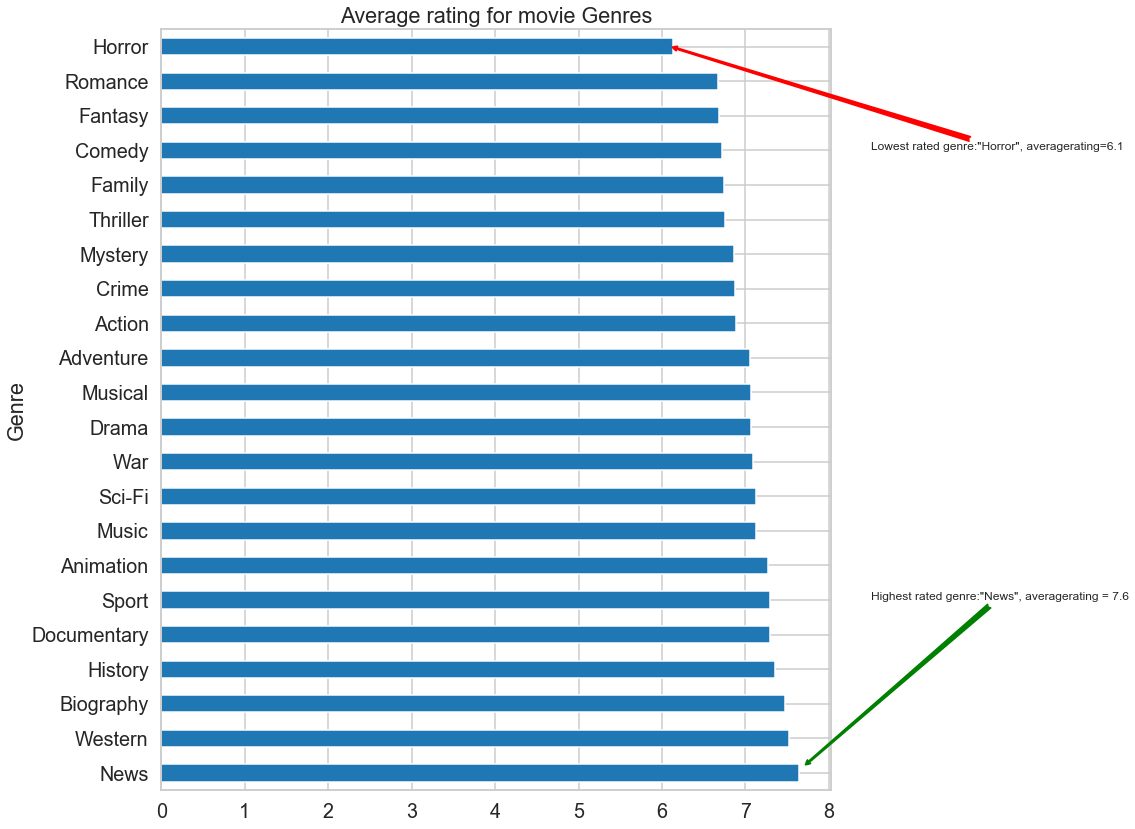

In [31]:
#plotting the rating_weighted_average per genre, annotating the top and worst rated genres
ax = rating_weighted_average.plot('Genre', 'Weighted_AvgRating', kind='barh', figsize=(12,14), legend=None);
ax.set_title('Average rating for movie Genres');
ax.annotate('Highest rated genre:"News", averagerating = 7.6', xy=(7.7, 0.2), xytext=(8.5,5), arrowprops={'color':'green', 'arrowstyle':'fancy'}, size=12);
ax.annotate('Lowest rated genre:"Horror", averagerating=6.1', xy=(6.1, 21), xytext=(8.5,18), arrowprops={'color': 'red', 'arrowstyle':'fancy'},  size=12);


However, the above analysis and barchart does not account for or represent the difference in the number of data points per genre.
In order to display this more accurately, I will use the 'averagerating' measure as provided in the dataset, group by genre and exploit Seaborn's capabilities to visually represent the difference in the number of votes.

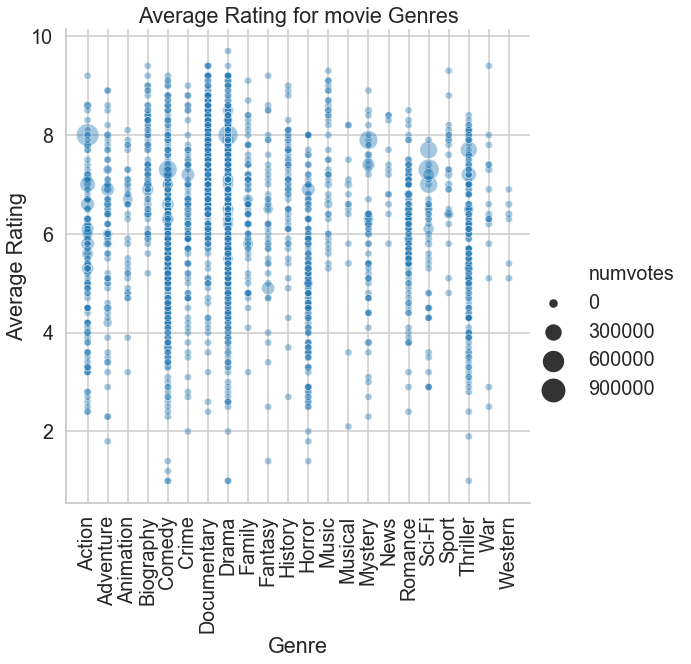

In [33]:
#plotting averagerating grouped by genre, where point size represents number of votes 
#using a sample of DF to not overwhelm the plot, grouping by Genre first to ensure sampling of all genres
genres_rating_melted_sample = genres_rating_removed.groupby('Genre').apply(lambda x: x.sample(frac=0.02)).set_index('tconst')

plot=sns.relplot(x="Genre", y="averagerating", size="numvotes",
            sizes=(50, 500), alpha=.4, palette="muted",height=8, data=genres_rating_melted_sample, legend='brief');
sns.set_style('whitegrid'); 
sns.set_context("talk", font_scale=1.2);
plot.set_xticklabels(rotation=90).set(xlabel='Genre', ylabel='Average Rating', title='Average Rating for movie Genres');


### Results & Action

*bonus combination = average rating (8-10) with a significant number of votes* <br>

The top 3 rated genres that Microsoft should consider debuting in are:

1. **'Drama'**: high rating for high proportion of movies, including a bonus combination
2. **'Documentary'** : this genre has highest frequency of top rated movies (but no bonus combo observed)
3. **'Thriller'**: a bonus combination plus proportionately high number of high rated movies


## Q2 - What is the average movie run-time for different production budgets?

In [69]:
#The DFs required for this analysis
tn_movie_budgets = data_dict['tn_movie_budgets']
imdb_title_basics = data_dict['imdb_title_basics']

In [70]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [71]:
#summary data for the DF
print(tn_movie_budgets.info(),'\n\n',
      tn_movie_budgets.shape, '\n\n',
      tn_movie_budgets.columns, '\n\n',
      tn_movie_budgets.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB
None 

 (5782, 5) 

 Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object') 

 release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


Points to Note:
1. No missing values to deal with 
2. 'Release_date' col needs to be converted to datetime object
3. Index - check and set to be unique 
4. Drop unnecessary columns: 'domestic_gross', 'worldwide_gross'

In [72]:
#changing datatype of 'release_date' col to datetime and extracting the year element only 
tn_movie_budgets['release_date']=pd.to_datetime(tn_movie_budgets['release_date'], errors ='coerce').dt.year
tn_movie_budgets['release_date'].isna().any()


False

In [73]:
#changing the datatype of 'production_budget' to integer as will be using this to column to return summary stats 
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.lstrip('$').str.replace(',', '').astype('int')
tn_movie_budgets= tn_movie_budgets.drop(axis=1, columns =['domestic_gross', 'worldwide_gross'])
tn_movie_budgets.head()


,release_date,movie,production_budget
id,,,
1,2009,Avatar,425000000
2,2011,Pirates of the Caribbean: On Stranger Tides,410600000
3,2019,Dark Phoenix,350000000
4,2015,Avengers: Age of Ultron,330600000
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000


In [74]:
#checking for duplicates using a combination of 'release_date' and 'movie' title to identify a unique entry
#return number of duplicate movies(keep=false marks all duplicates as true)
tn_movie_budgets.duplicated(subset = ['release_date', 'movie'], keep=False).sum()

2

There are 2 duplicate rows in the dataset, so 1 will need to be dropped.

In [75]:
#dropping the duplicate row
tn_movie_budgets_cleaned= tn_movie_budgets.drop_duplicates(subset = ['release_date', 'movie'])

#checking the length of cleaned df has reduced by 1 as expected
print(len(tn_movie_budgets),
      len(tn_movie_budgets_cleaned))

5782 5781


In [76]:
#function to check for unique index in DF, and reset if not unique
def set_unique_index(df):
    unique_test= df.index.is_unique
    if unique_test == False:
        df.reset_index(drop = True, inplace= True)
        print('The index has been reset')
    else:
        print('The current index is unique so has not been reset')
    return df.head()

In [77]:
set_unique_index(tn_movie_budgets_cleaned)

The index has been reset


,release_date,movie,production_budget
0,2009,Avatar,425000000
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000
2,2019,Dark Phoenix,350000000
3,2015,Avengers: Age of Ultron,330600000
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000


In [78]:
tn_movie_budgets_cleaned.describe()

,release_date,production_budget
count,5781.000000,5.781000e+03
mean,2003.966269,3.159313e+07
std,12.725315,4.181369e+07
min,1915.000000,1.100000e+03
25%,2000.000000,5.000000e+06
50%,2007.000000,1.700000e+07
75%,2012.000000,4.000000e+07
max,2020.000000,4.250000e+08


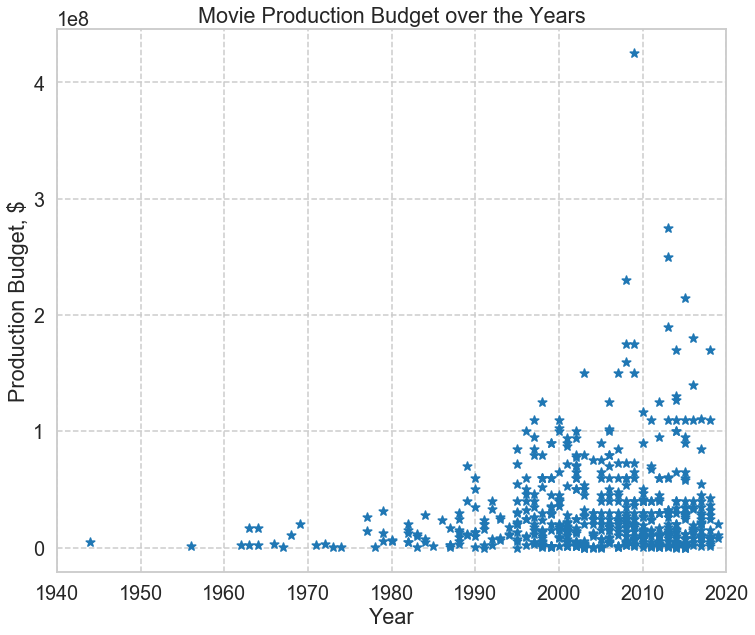

In [142]:
#scatterplot for production budget over the years
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter('release_date', 'production_budget', data=tn_movie_budgets_cleaned.sample(frac=.1), marker='*')
ax.set_title('Movie Production Budget over the Years')
ax.set_xlabel("Year")
ax.set_ylabel("Production Budget, $")
ax.grid(linestyle='dashed');
ax.set_xlim(1940, 2020);

In [80]:
#DF required for runtime data
imdb_title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [81]:
#summary data for DF
print(imdb_title_basics.info(), '\n\n',
      imdb_title_basics.shape, '\n\n',
      imdb_title_basics.columns, '\n\n',
      imdb_title_basics.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 11.7+ MB
None 

 (146144, 5) 

 Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object') 

 primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [82]:
imdb_title_basics['primary_title'].is_unique

False

Points to note:
1. Columns to drop: 'original_title', 'genres', 'start_year'
2. Remove missing data in 'runtime_minutes'
3. Remove duplicate movies -'primary_title' will be used to identify a unique entry- this column will act as the primary key in the joining of DFs at the next stage

In [83]:
#dropping unnecessary columns and removing missing data rows
imdb_title_basics= imdb_title_basics.drop(axis= 1, columns =['original_title', 'genres', 'start_year']).dropna()

#finding the number of duplicated rows to be dropped
imdb_title_basics.duplicated(subset =['primary_title'], keep='first').sum()

6946

In [84]:
#dropping duplicate rows 
imdb_title_basics_cleaned = imdb_title_basics.drop_duplicates(subset=['primary_title'])

#checking the difference is equal to the number of duplicated rows
print(len(imdb_title_basics)-len(imdb_title_basics_cleaned))

6946


In [39]:
set_unique_index(imdb_title_basics_cleaned)

The current index is unique so has not been reset


,primary_title,runtime_minutes
tconst,,
tt0063540,Sunghursh,175.0
tt0066787,One Day Before the Rainy Season,114.0
tt0069049,The Other Side of the Wind,122.0
tt0100275,The Wandering Soap Opera,80.0
tt0111414,A Thin Life,75.0


In [85]:
#summary stats for runtime
imdb_title_basics_cleaned.describe()

,runtime_minutes
count,107459.000000
mean,86.195712
std,171.438678
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


Min and max values indicate outliers exist. These will need to be detected and removed. 

In [163]:
#function to identify and remove outliers using IQR
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-(1.5*iqr)
    fence_high = q3+(1.5*iqr)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out 

runtime = remove_outlier(imdb_title_basics_cleaned, 'runtime_minutes')
runtime.describe() #focus on min/max to check these are no longer obvious outliers

,runtime_minutes
count,101149.000000
mean,84.960603
std,21.892446
min,27.000000
25%,71.000000
50%,87.000000
75%,98.000000
max,142.000000


In [87]:
#inner join of the 2 DFs
prodbudg_runtime = runtime.merge(tn_movie_budgets_cleaned, how='inner', left_on= 'primary_title', right_on = 'movie')

#dropping the redundant column
prodbudg_runtime=prodbudg_runtime.drop(axis=1, columns='movie')
prodbudg_runtime

,primary_title,runtime_minutes,release_date,production_budget
0,Foodfight!,91.0,2012,45000000
1,The Overnight,88.0,2015,200000
2,On the Road,124.0,2013,25000000
3,The Secret Life of Walter Mitty,114.0,2013,91000000
4,A Walk Among the Tombstones,114.0,2014,28000000
...,...,...,...,...
2159,Stay Alive,72.0,2006,20000000
2160,Darkness,98.0,2004,10600000
2161,The Blue Bird,84.0,1976,1200000
2162,Traitor,110.0,2008,22000000


In [158]:
#pairwise correlation between runtime,production budget and release date
prodbudg_runtime.corr()

,runtime_minutes,release_date,production_budget
runtime_minutes,1.000000,0.213555,0.275995
release_date,0.213555,1.000000,0.115644
production_budget,0.275995,0.115644,1.000000


In [161]:
prodbudg_runtime.corr().loc['runtime_minutes', 'production_budget'].round(4)

0.276

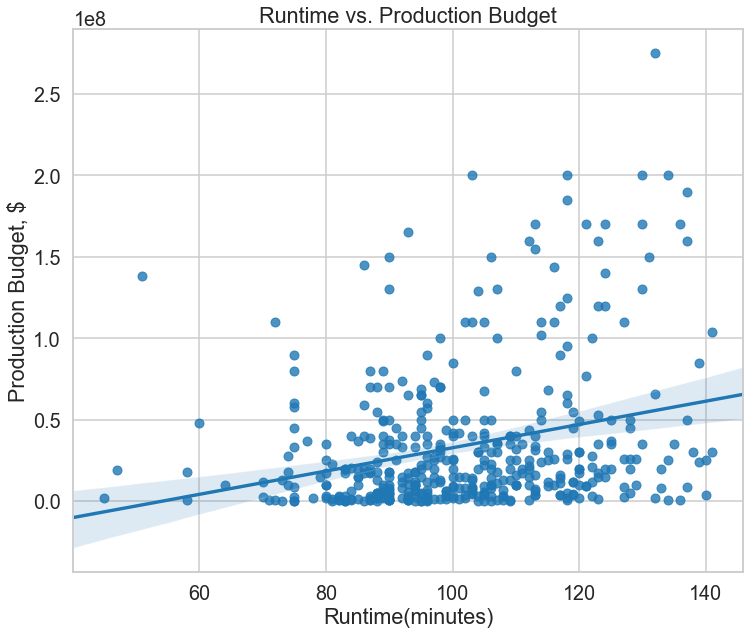

In [143]:
#plot to visualise runtime vs production budget
plt.figure(figsize=(12, 10))
sns.regplot(x='runtime_minutes', y='production_budget', data=prodbudg_runtime.sample(frac=0.2))
plt.xlabel('Runtime(minutes)')
plt.ylabel('Production Budget, $')
plt.title("Runtime vs. Production Budget");

### Results & Action

- Movie production budget shows a positive trend with time. This is as expected due to economic factors such as inflation.


- The correlation coefficient between movie runtime and  production budget = 0.276 : weak positive correlation so little evidence of a relationship between movie runtime and production budget. Whilst the regression plot shows that there is a positive trend between the 2 variables, it is weak as there are also many data points which show variation from the line of best fit. ie. a longer length movie is not always achieved with a high production budget. It is likely that runtime is one of many other variables which determine the production budget of a movie. Future work: multiple regression analysis to determine which variables influence production budget the most


- In order to stay within their set production budget, Microsoft do not need to focus heavily on producing a movie with a specific runtime. The average movie runtime is 85 minutes (standard deviation 22 minutes), so aiming within this range would be a good choice for their debut.

## Q3 - Who are the top movie studios?

I will carry out this analysis on a data subset of the highest rated movies, where 'averagerating' will be the measure to determine movie rating.

First, I will investigate the ratings dataset and ensure this can be used as reliable measure to identify the highest rated movies.

In [108]:
ratings = data_dict['imdb_title_ratings']
ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [109]:
#statistical summary of df
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The 'averagerating' column will be used to determine the highest rated movies. However the number of votes contributing to each average rating is inconsistent and has a large range. (max=1841066, min=5). I will assume that the entries with a higher number of votes are a closer representation of the true averagerating and so will filter to use data from the 4th quartile only. I will not be removing any statistical outliers as it is possible these may not be true outliers as it is likely there will be some movies which have a significantly higher number of reviews/votes.

In [110]:
#filtering dataset for 4th Quartile of Number of votes
q_low = ratings['numvotes'].quantile(0.75)
q_high = ratings['numvotes'].quantile(1)

ratings_Q4= ratings.query('@q_low <= numvotes <= @q_high')
ratings_Q4['numvotes'].mean().round(0)

13917.0

*note: For 'ratings_Q4', the mean number of votes per movie is 13,917 (compared to 3,523 per movie for 'ratings'.)* 

In [111]:
#DFs required for studio analysis
titles = data_dict['imdb_title_basics']
studios = data_dict['bom_movie_gross']

In [112]:
studios.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [113]:
#summary data for studios DF
print(studios.info(), '\n\n',
      studios.columns, '\n\n',
      studios.shape, '\n\n', 
      studios.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None 

 Index(['studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object') 

 (3387, 4) 

 studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Points to note:
1. missing values in 'studio' column - to be removed
2. gross revenue columns will not be used for this analysis

In [114]:
#drop the missing values from 'studio' column
studios_cleaned = studios.dropna(subset=['studio'])
studios_cleaned['studio'].isna().sum()

0

In [115]:
studios_cleaned['studio'].describe()

count     3382
unique     257
top        IFC
freq       166
Name: studio, dtype: object

In [116]:
#merge 3 DFs together using an inner join
studio_ratings =titles.merge(ratings_Q4, left_index=True, right_index=True).merge(studios_cleaned, left_on='primary_title', right_index=True)

#number of rows in the resulting DF
studio_ratings.shape[0]

2653

In [117]:
studio_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [118]:
#selecting relevant rows & columns to produce DF for the top100 rated movies
cols= ['primary_title', 'averagerating', 'studio']
top100rated = studio_ratings[cols].sort_values('averagerating', ascending=False).iloc[:100]
top100rated

,primary_title,averagerating,studio
tconst,,,
tt9151704,Burn the Stage: The Movie,8.8,Trafalgar
tt1375666,Inception,8.8,WB
tt3313066,Coriolanus,8.7,Wein.
tt1424432,Senna,8.6,PDA
tt0816692,Interstellar,8.6,Par.
...,...,...,...
tt1702014,The Way He Looks,7.9,Strand
tt1065073,Boyhood,7.9,IFC
tt1816518,Ernest & Celestine,7.9,GK


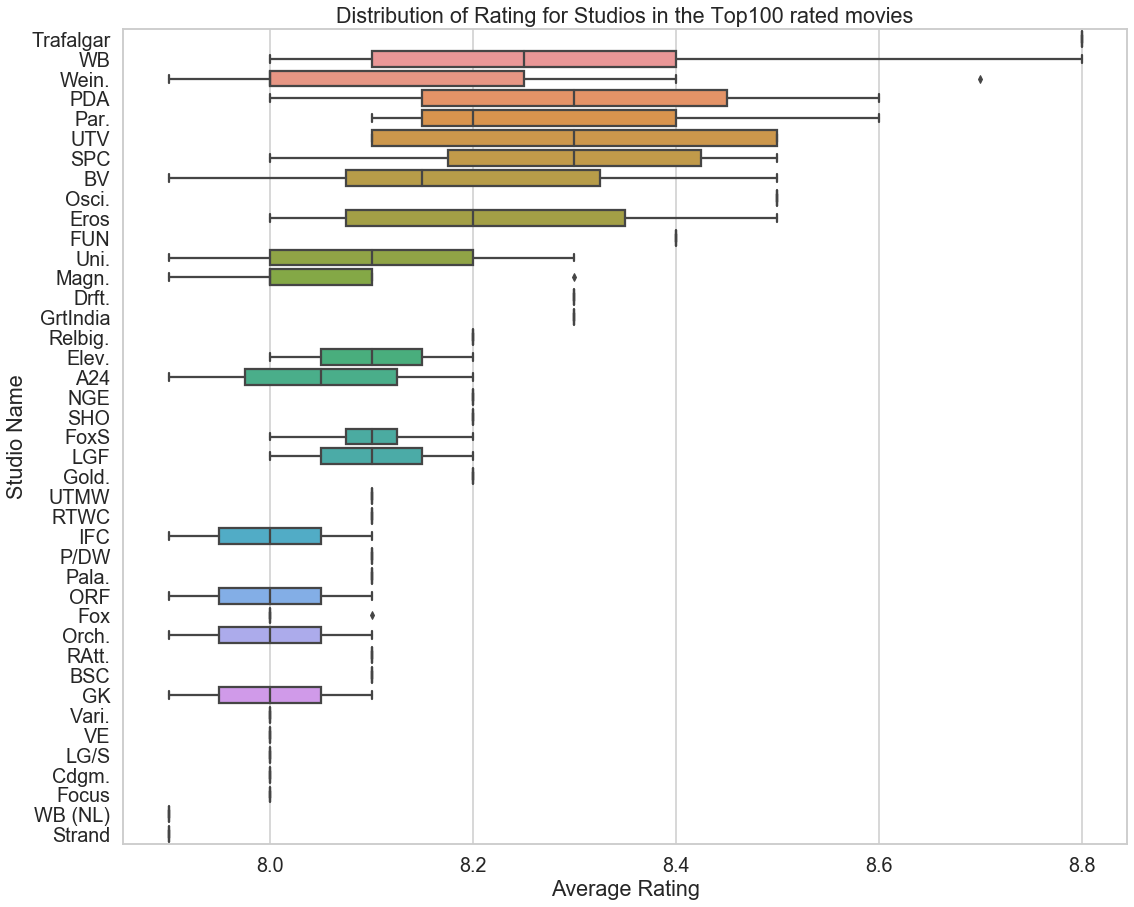

In [149]:
#boxplot showing rating distribution for each studio
fig, ax = plt.subplots(figsize=(18,15))
ax=sns.boxplot(x='averagerating', y='studio', data=top100rated)
ax.set(xlabel='Average Rating', ylabel='Studio Name', title='Distribution of Rating for Studios in the Top100 rated movies' );

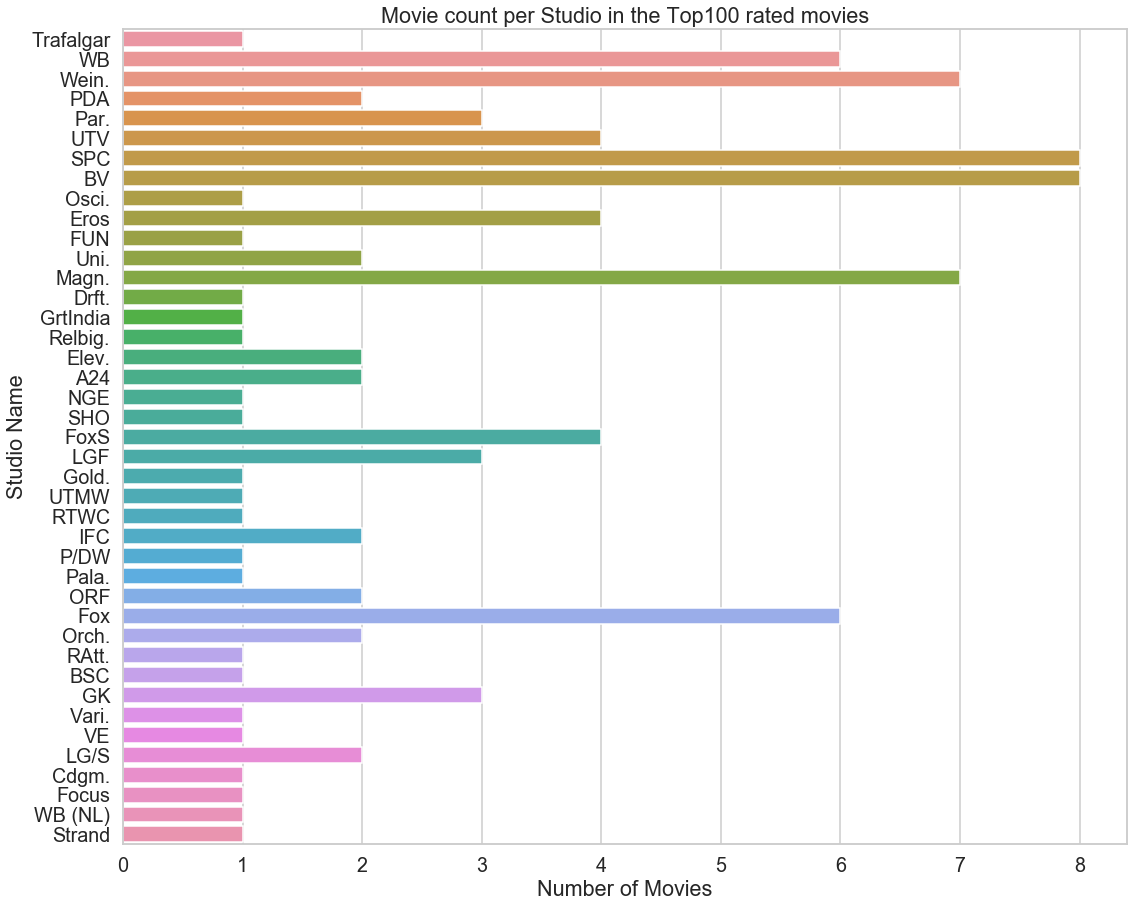

In [147]:
#horizontal bar chart for studio count
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.countplot(y='studio', data=top100rated)
ax.set(xlabel='Number of Movies', ylabel='Studio Name', title='Movie count per Studio in the Top100 rated movies');

In [122]:
#grouping by studio and returning movie count, max and mean ratings for top100rated
studios_top100= top100rated.groupby('studio').agg(Max_Rating = ('averagerating', 'max'),Mean_Rating=('averagerating', 'mean'), Number_of_Movies=('averagerating', 'count')).sort_values(['Max_Rating', 'Mean_Rating', 'Number_of_Movies'], ascending=[False, False, False]).reset_index()
studios_top100

,studio,Max_Rating,Mean_Rating,Number_of_Movies
0,Trafalgar,8.8,8.800000,1
1,WB,8.8,8.300000,6
2,Wein.,8.7,8.157143,7
3,PDA,8.6,8.300000,2
4,Par.,8.6,8.300000,3
5,Osci.,8.5,8.500000,1
6,UTV,8.5,8.300000,4
7,SPC,8.5,8.287500,8
8,Eros,8.5,8.225000,4
9,BV,8.5,8.187500,8


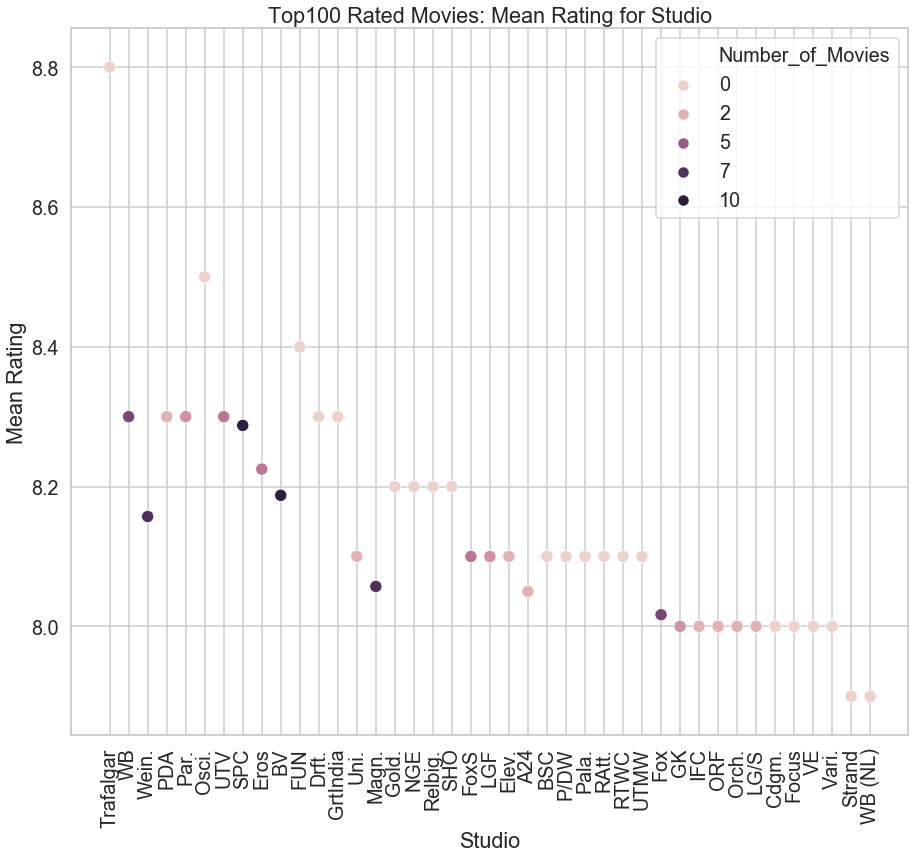

In [155]:
#scatter plot for mean rating per studio, with colour representing number of movies by each studio in the top100 rated
fig, ax = plt.subplots(figsize=(15,13))
ax= sns.scatterplot(x='studio', y='Mean_Rating', data=studios_top100, hue='Number_of_Movies', s=150)
ax.tick_params(axis='x', labelrotation=90);
ax.set(xlabel='Studio', ylabel='Mean Rating', title='Top100 Rated Movies: Mean Rating for Studio');                                                                    

### Results & Action

It is important for Microsoft to identify who the current market leaders are as this is vital for understanding the movie industry and predicting the direction and nature of future trends. To be solid competitors, Microsoft must first identify and comprehend the attributes of the environment in which they wish to compete.

This analysis was carried out to identify which Studios are behind the top100 rated movies.


1. 'SPC'(Sony Pictures Classics) and 'BV' (Buena Vista, aka Disney) were joint top for movie count and each produced 8 movies in the top100 rated.  Followed by 'MP' (Magnolia Pictures) and 'WB' (Warner Bros) each contributing 7 movies to the top100. 


2. The movies with a high mean rating have been produced by 'WB', 'UTV', 'SPC', and 'Eros'. (where the Studio has produced 5 or more movies in the top100) 

3. Looking at the distribution of the average rating for movies produced by these Studios, the strong performers are 'WB', 'PDA' and 'SPC'.


SPC(Sony Pictures Classics) can be awarded position of market leaders, closely followed by BV (Disney) and WB.
Microsoft's investment of resources into market research should focus on these studios.